In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pf = pd.read_csv('/kaggle/input/119-billy-joel-album-tracks-with-spotify-data/BillyJoelAlbumTracks.csv')

pf.head()

,Track,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Everybody Loves You Now,Cold Spring Harbor,1971,2:47,4,0.547,0.5620,11,-13.323,1,0.0477,0.339,0.000000,0.296,0.542,135.667,44
1,Falling of the Rain,Cold Spring Harbor,1971,2:37,4,0.473,0.4070,4,-13.679,1,0.0370,0.795,0.000000,0.258,0.674,125.671,32
2,Got to Begin Again,Cold Spring Harbor,1971,2:49,3,0.430,0.0952,7,-15.637,1,0.0399,0.924,0.000000,0.129,0.117,178.143,29
3,Nocturne,Cold Spring Harbor,1971,2:46,3,0.328,0.0384,9,-25.465,0,0.0434,0.990,0.912000,0.108,0.217,123.305,29
4,She's Got a Way,Cold Spring Harbor,1971,2:49,4,0.495,0.1420,11,-16.186,0,0.0436,0.970,0.000002,0.113,0.196,75.859,52


In [2]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             118 non-null    object 
 1   Album             118 non-null    object 
 2   Year              118 non-null    int64  
 3   Duration          118 non-null    object 
 4   Time_Signature    118 non-null    int64  
 5   Danceability      118 non-null    float64
 6   Energy            118 non-null    float64
 7   Key               118 non-null    int64  
 8   Loudness          118 non-null    float64
 9   Mode              118 non-null    int64  
 10  Speechiness       118 non-null    float64
 11  Acousticness      118 non-null    float64
 12  Instrumentalness  118 non-null    float64
 13  Liveness          118 non-null    float64
 14  Valence           118 non-null    float64
 15  Tempo             118 non-null    float64
 16  Popularity        118 non-null    int64  
dt

<Figure size 1000x600 with 0 Axes>

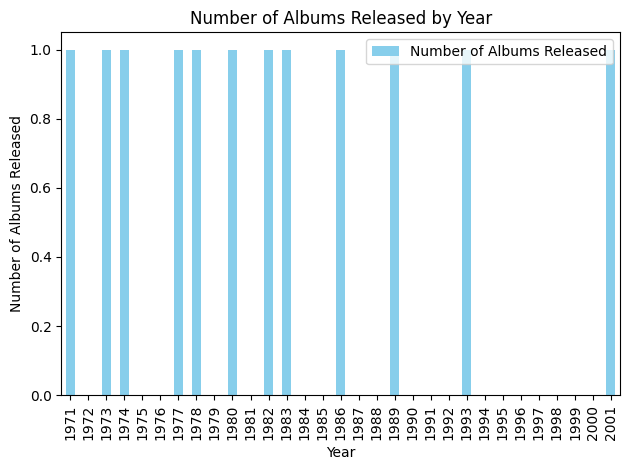

In [3]:
# Drop duplicate albums within the same year to count unique albums
unique_albums_per_year = pf.drop_duplicates(subset=['Album', 'Year'])

# Group by Year and count the number of unique albums released
album_counts = unique_albums_per_year.groupby('Year').size()

# Ensure album_counts has a name
album_counts.name = 'Number of Albums Released'

# Create a DataFrame to ensure all years are included in the plot
all_years = pd.DataFrame({'Year': range(min(album_counts.index), max(album_counts.index) + 1)})
album_counts = all_years.set_index('Year').join(album_counts).fillna(0).astype(int)

# Plot
plt.figure(figsize=(10, 6))
album_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Albums Released')
plt.title('Number of Albums Released by Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

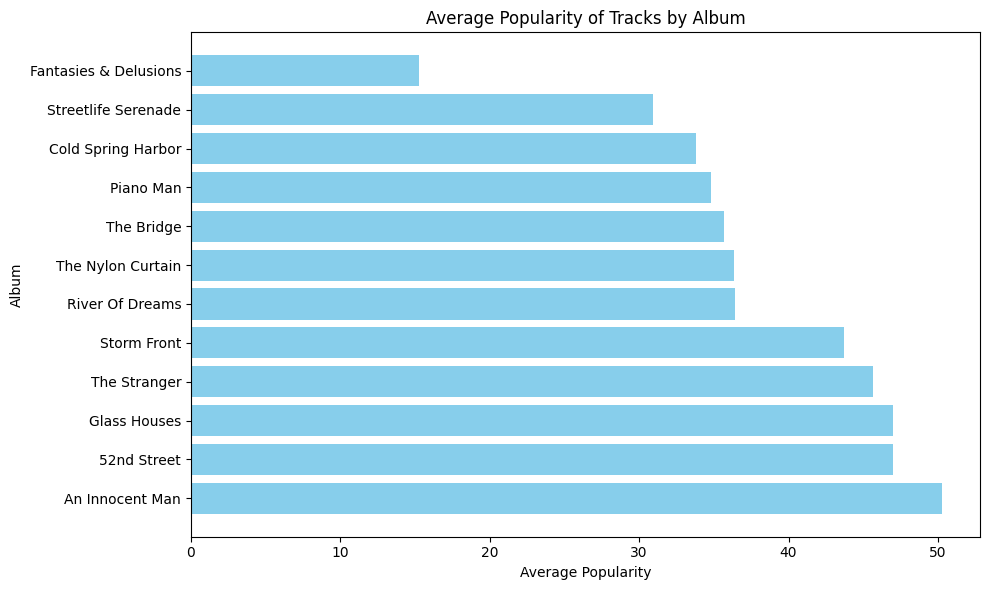

In [4]:
# Group by Album and calculate the average popularity for each album
average_popularity_per_album = pf.groupby('Album')['Popularity'].mean()

# Sort values by average popularity in descending order
average_popularity_per_album_sorted = average_popularity_per_album.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(average_popularity_per_album_sorted.index, average_popularity_per_album_sorted, color='skyblue')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.title('Average Popularity of Tracks by Album')
plt.tight_layout()
plt.show()

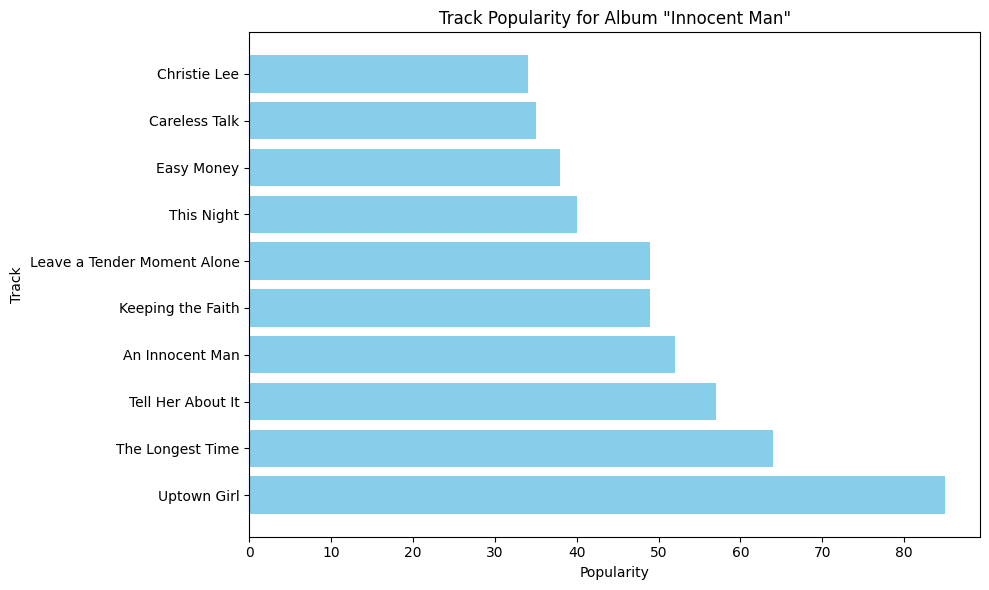

In [5]:
# Filter tracks from the album "Innocent Man"
tracks_innocent_man = pf[pf['Album'] == 'An Innocent Man'][['Track', 'Popularity']]

# Ensure that track names and popularity are not null
tracks_innocent_man = tracks_innocent_man.dropna()

# Sort values by popularity in descending order
tracks_innocent_man_sorted = tracks_innocent_man.sort_values(by='Popularity', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(tracks_innocent_man_sorted['Track'], tracks_innocent_man_sorted['Popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Track')
plt.title('Track Popularity for Album "Innocent Man"')
plt.tight_layout()
plt.show()

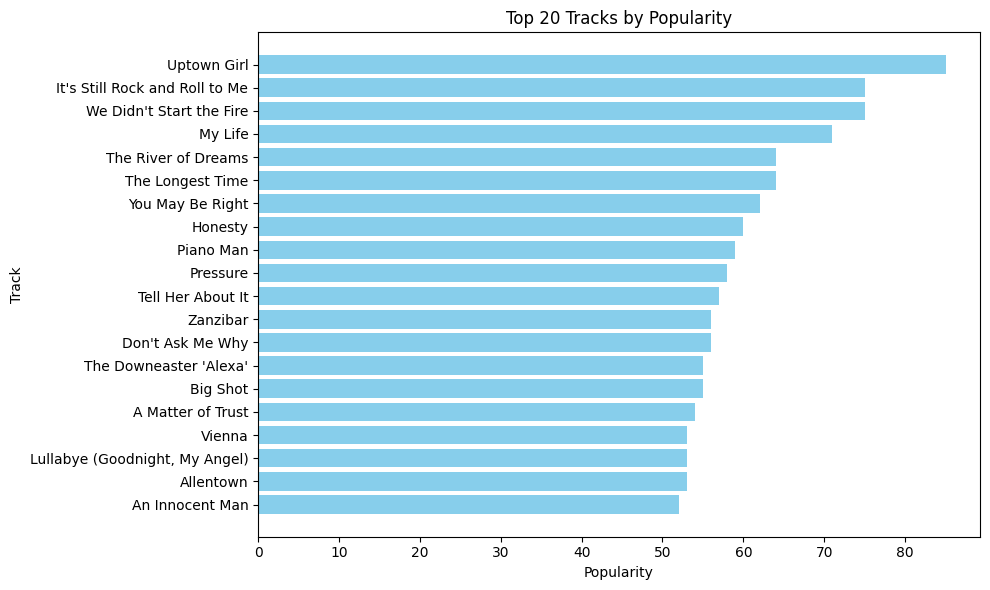

In [6]:
# Ensure track names and popularity are not null
tracks_filtered = pf[['Track', 'Popularity']].dropna()

# Sort by popularity in descending order and select the top 20 tracks
top_20_tracks = tracks_filtered.sort_values(by='Popularity', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_tracks['Track'], top_20_tracks['Popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Track')
plt.title('Top 20 Tracks by Popularity')
plt.gca().invert_yaxis()  # Invert y-axis to show the most popular track at the top
plt.tight_layout()
plt.show()

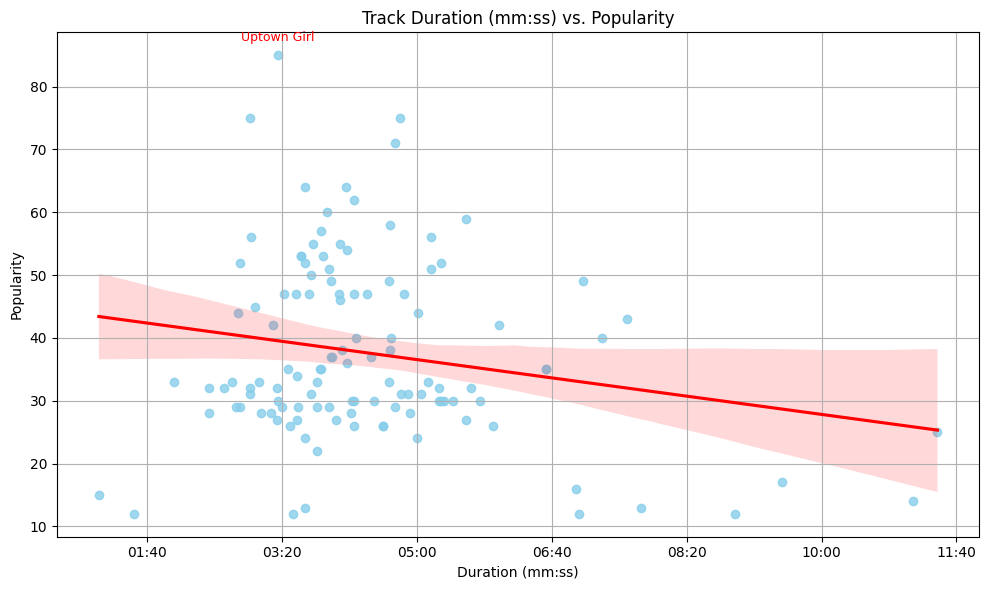

In [7]:
# Convert mm:ss to total seconds for plotting
def mmss_to_seconds(mmss):
    try:
        minutes, seconds = map(int, mmss.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return 0  # Default to 0 if conversion fails

# Apply conversion function to the 'Duration' column
pf['Duration_seconds'] = pf['Duration'].apply(mmss_to_seconds)

# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Duration_seconds', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Duration_seconds'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0,10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red'
)

# Annotate x-axis with mm:ss format
plt.xlabel('Duration (mm:ss)')
plt.ylabel('Popularity')
plt.title('Track Duration (mm:ss) vs. Popularity')

# Set x-ticks to show mm:ss format
def format_func(value, tick_number):
    try:
        minutes = int(value // 60)
        seconds = int(value % 60)
        return f'{minutes:02}:{seconds:02}'
    except:
        return ''

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.grid(True)
plt.tight_layout()
plt.show()

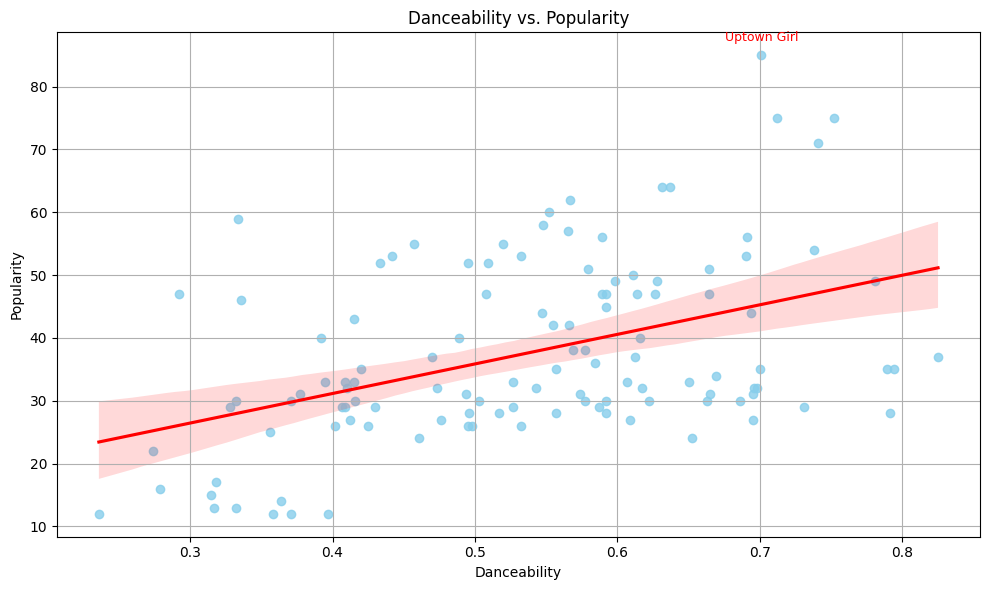

In [8]:
# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Danceability', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Danceability'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0,10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red'
)

# Add labels and title
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs. Popularity')

plt.grid(True)
plt.tight_layout()
plt.show()

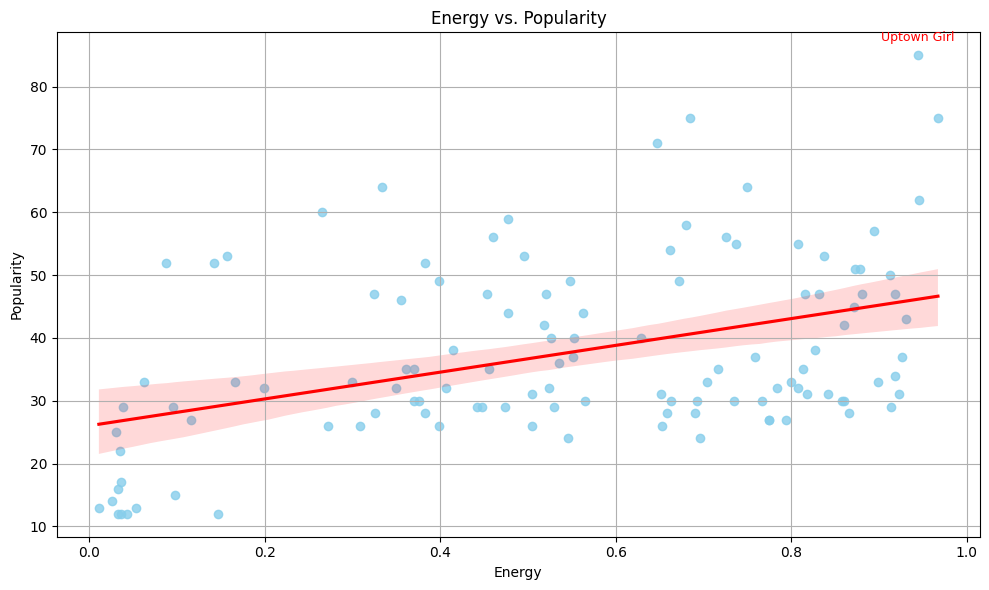

In [9]:
# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Energy', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Energy'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0,10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red'
)

# Add labels and title
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs. Popularity')

plt.grid(True)
plt.tight_layout()
plt.show()

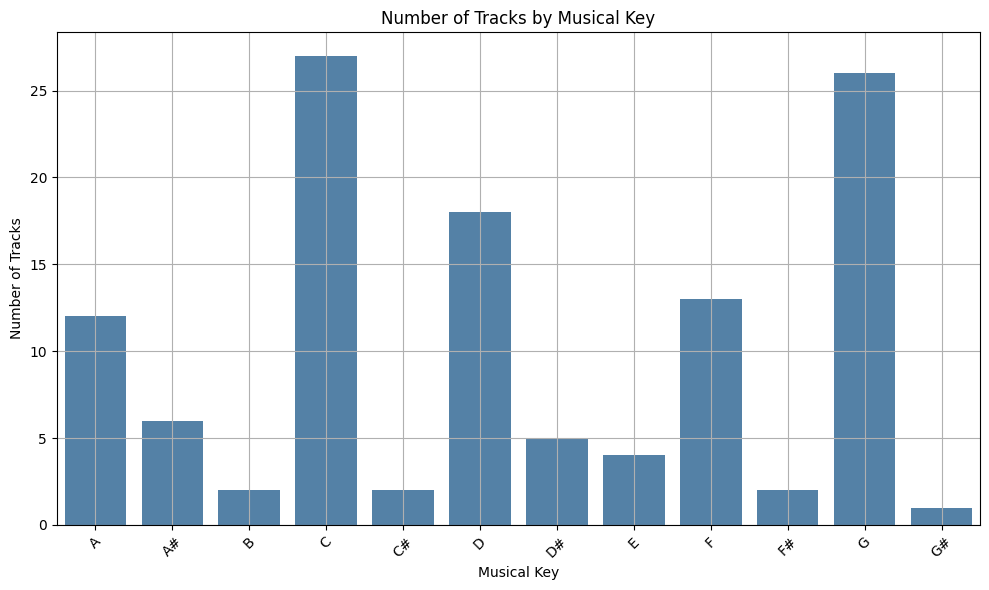

In [10]:
# Convert numerical keys to letter notation
key_mapping = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G',
    8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}

# Apply conversion to the 'Key' column
pf['Key_letter'] = pf['Key'].map(key_mapping)

# Count the number of tracks for each key
key_counts = pf['Key_letter'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))  # Adjust the figure size to ensure it fits well
sns.barplot(x=key_counts.index, y=key_counts.values, color='steelblue')

# Add labels and title
plt.xlabel('Musical Key')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks by Musical Key')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

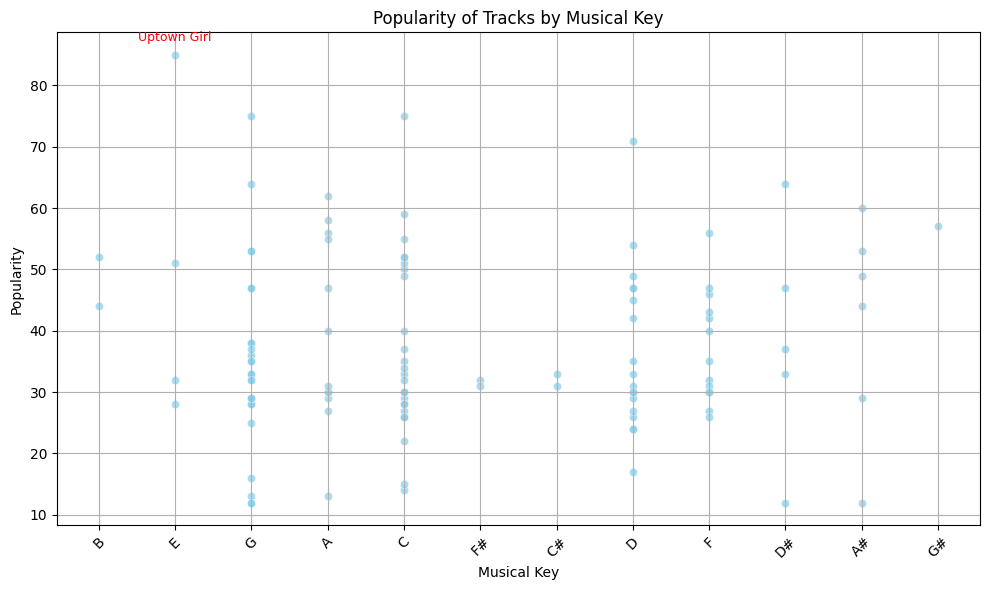

In [11]:
# Convert numerical keys to letter notation
key_mapping = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G',
    8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}

# Apply conversion to the 'Key' column
pf['Key_letter'] = pf['Key'].map(key_mapping)

# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Key_letter', y='Popularity', data=pf, color='skyblue', alpha=0.7)

# Add label for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Key_letter'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0,10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red'
)

# Add labels and title
plt.xlabel('Musical Key')
plt.ylabel('Popularity')
plt.title('Popularity of Tracks by Musical Key')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

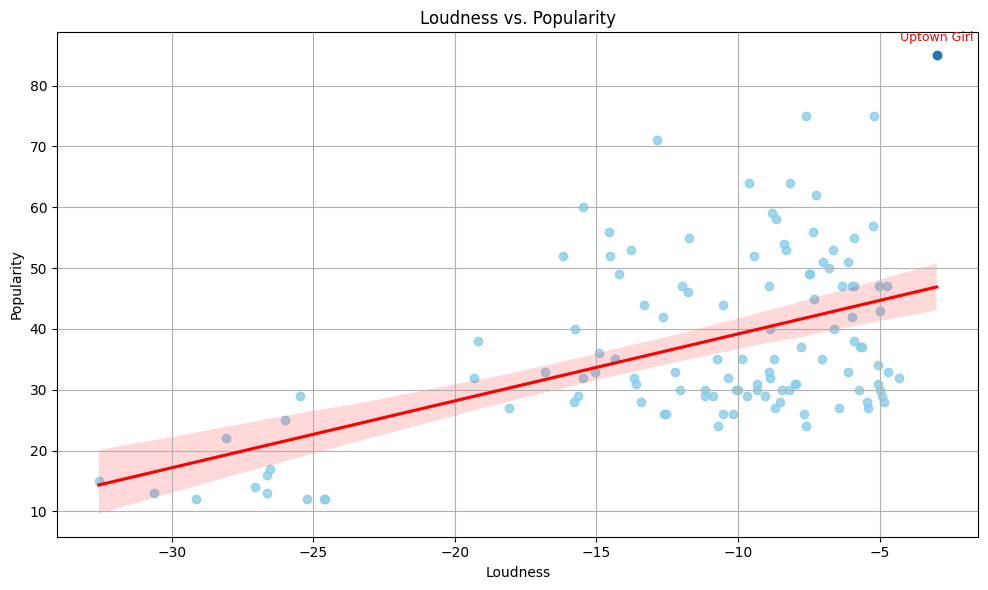

In [12]:
# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Loudness', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Highlight the highest-rated track
plt.scatter(
    highest_rated['Loudness'],
    highest_rated['Popularity'],
    label='Highest Rated Track'
)

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Loudness'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0,10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red',
)

# Add labels, title, and legend
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Loudness vs. Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

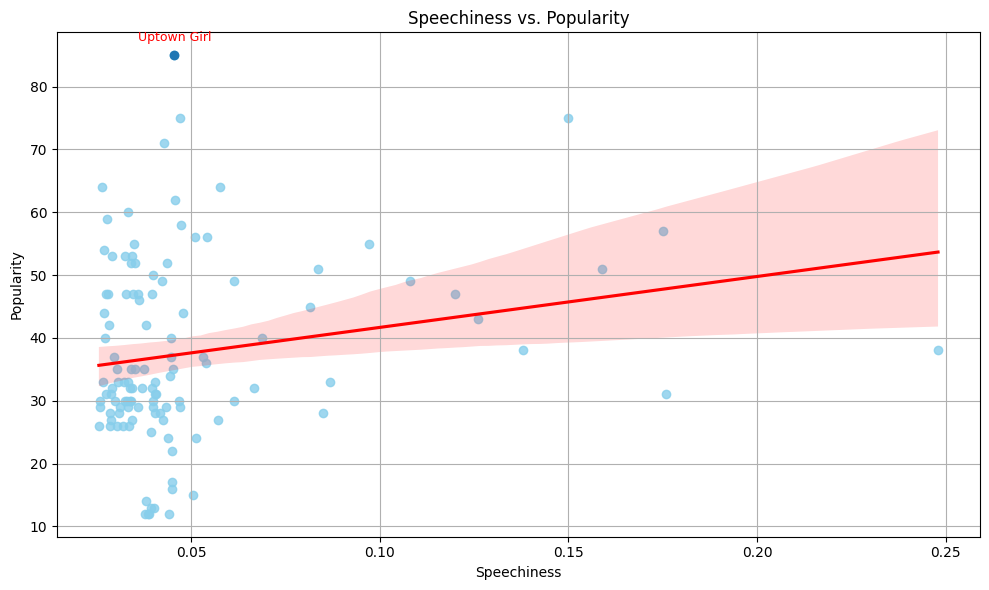

In [13]:
# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Speechiness', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Highlight the highest-rated track
plt.scatter(
    highest_rated['Speechiness'],
    highest_rated['Popularity'],
    label='Highest Rated Track'
)

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Speechiness'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0,10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red',
)

# Add labels, title, and legend
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.title('Speechiness vs. Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

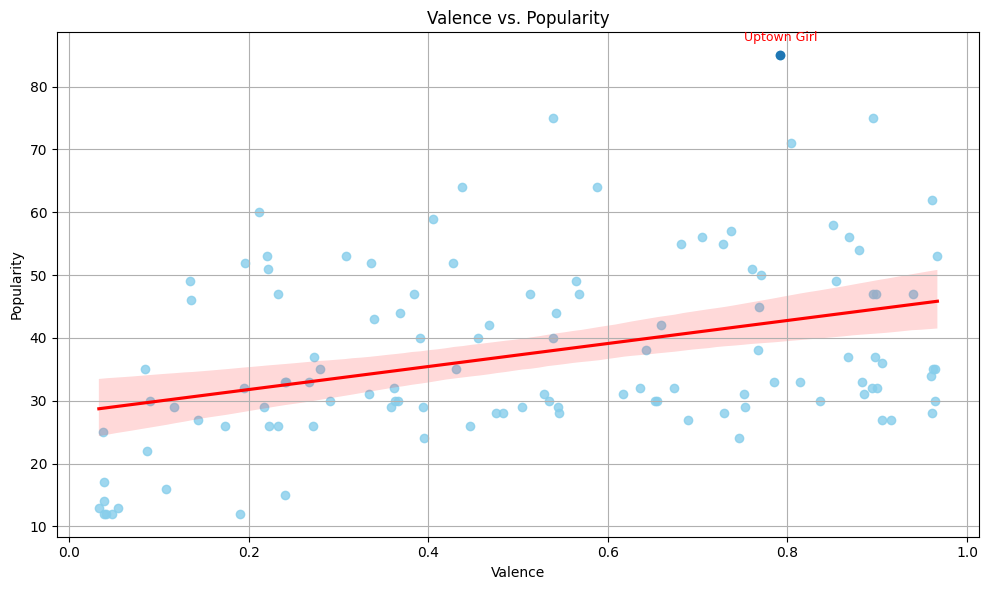

In [14]:
# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Valence', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Highlight the highest-rated track
plt.scatter(
    highest_rated['Valence'],
    highest_rated['Popularity'],
    label='Highest Rated Track'
)

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Valence'], highest_rated['Popularity']),
    textcoords="offset points",
    color='red',
    xytext=(0, 10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
)

# Add labels, title, and legend
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Valence vs. Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

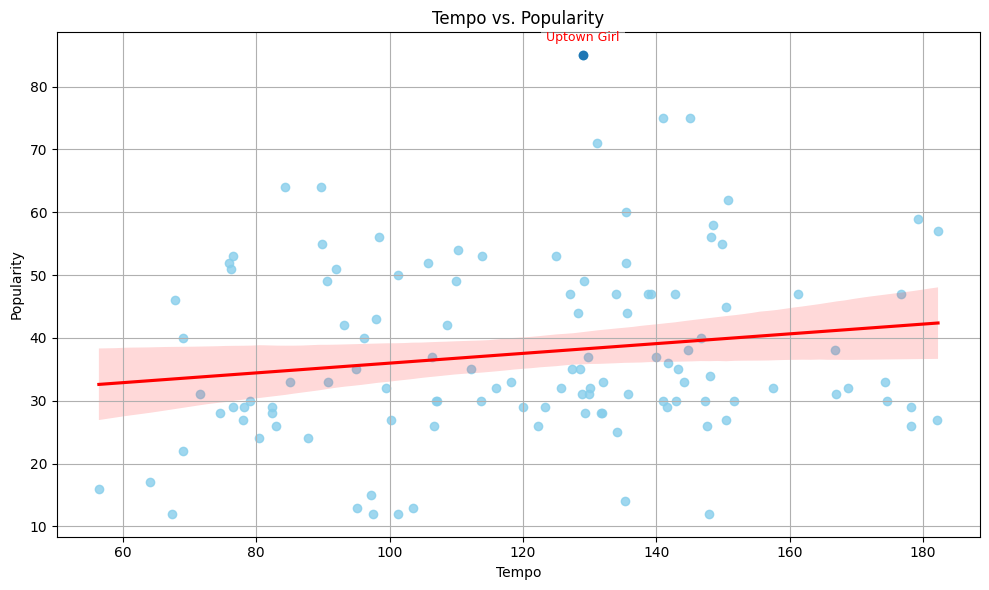

In [15]:
# Find the highest-rated track
highest_rated = pf.loc[pf['Popularity'].idxmax()]

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Tempo', y='Popularity', data=pf, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

# Highlight the highest-rated track
plt.scatter(
    highest_rated['Tempo'],
    highest_rated['Popularity'],
    label='Highest Rated Track'
)

# Add annotation for the highest-rated track
plt.annotate(
    highest_rated['Track'],  # Label with the track name
    (highest_rated['Tempo'], highest_rated['Popularity']),
    textcoords="offset points",
    xytext=(0, 10),  # Position the text slightly above the point
    ha='center',
    fontsize=9,
    color='red',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.5)  # Optional: add a background to the text
)

# Add labels, title, and legend
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.title('Tempo vs. Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()